In [1]:
import pandas as pd
import missingno

In [2]:
#Carga el excel en un Dataframe (datos de las SW)
df= pd.read_excel('../Data/BV Safety_All Safety Walks.xlsx',engine='openpyxl')
df.columns

Index(['Application: BV Safety', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39'],
      dtype='object')

In [3]:
df1=df.drop([0,1,2,3])

In [4]:
new_header = df1.iloc[0] #grab the first row for the header
df2 = df1[1:] #take the data less the header row
df2.columns = new_header #set the header row as the df header

In [5]:
df3=df2.reset_index()

In [6]:
df4 = df3.rename(columns = {'Number':'Número',
                            'Created Date':'Fecha de creación',
                            'Name of the Observer':'Nombre del observador',
                            'Name of the Observed Person(s)':'Nombre de la persona o personas observadas',
                            'Operating Group':'Grupo Operativo',
                            'Country':'País',
                            'Entity':'Entidad',
                            'Site':'Sitio',
                            'BV Site Name':'Nombre del sitio de BV',
                            'Client Name':'Nombre del cliente',
                            'Site Address':'Dirección del sitio',
                            '1. Mind On Task?': '1. ¿Mente en la tarea?', 
                            '2. Eyes on Task?': '2. ¿Ojos puestos en la tarea?',
                            '3. Using equpment properly?': "3. ¿Utiliza el equipo correctamente?",
                            '4. Performing task while not rushing?': "4. ¿Realiza la tarea sin apresurarse?",
                            '5. Wearing prescribed PPE?': '5. ¿Usa el EPI definido?',
                            '6. Following Safe Working Procedures?':'6. ¿Sigue procedimientos de trabajo seguros?',
                            '7. Authorization is obtained...':'7. Se obtiene la autorización ...',
                            '8. Check surrounding work areas...':'8. Verifica el entorno de trabajo, 2 min para mi seguridad',
                            '9. Personnel acted safely for the task observed':'9. El personal actuó con seguridad para la tarea observada.',
                            '10. Aware of the Emergency Evacuation...':'10.Conoce la Ruta de Evaluación de Emergencias y el Punto de Reunión',
                            '11. The person is aware of the need to report near hit and unsafe situation.':'11. La persona es consciente de la necesidad de reportar Cuasi Accidentes y Condiciones Inseguras?.',
                            '12. Personnel stops Working if the situation is unsafe.':'12. El personal deja de trabajar si la situación no es segura.',
                            '13. Personnel is competent and trained...':'13. El personal esta capacitado y suficientemente formado para la Tarea.',
                            '14. Adequate and worn correctly the applicable PPE':'14. Los EPIS definidos son adecuados y se usan correctamente.',
                            '15. Good conditions, well maintained and properly stored.':'15. los EPIS estan en buen estado, bien mantenidos y se almacenan correctamente.',
                            '16. Good housekeeping of the work area...':'16. Buena limpieza del área de trabajo',
                            '17. Area Free of Slip Trip and Fall Hazards':'17. Área libre de riesgos de resbalones, tropiezos y caídas',
                            '18. Walkways, aisles, emergency exits...':'18. Pasillos, salidas de emergencia y equipos de emergencia no estan obstruidos.',
                            '19. Spillage controlled':'19. Derrames controlados',
                            '20. All containers in use and in the area are labelled.':'20. Todos los contenedores en uso y en el área están etiquetados.',
                            '21. No Noise, Dust, Odor Issues':'21. Sin ruidos, polvo ni olores',
                            '22. Hazardous substances are stored properly':'22. Las sustancias peligrosas se almacenan adecuadamente',
                            '23. The work area is secured from hazards...':'23. El área de trabajo está protegida contra riesgos',
                            '24. Sufficient lighting and ventilation.':'24. Iluminación y ventilación suficientes.',
                            '25. Use intrinsically safe equipment...':'25. Uso de equipos intrínsecamente seguro.',
                            '26. Machine guarding or Lock-Out-Tag-Out...':'26. Protección de la maquina o señal de bloqueo-etiquetado disponible',
                            '27. Scaffold or ladder is safe for use.':'27. El andamio o la escalera son seguros para su uso.',
                            'Did I use my Stop Work Authority?':'¿Usé mi autorización para detener el trabajo?',
                            'Comments / Action Plan':'Comentarios / Plan de acción'},
                            
                                             inplace = False)
                                        
                                        
                                        
                                        

In [7]:
#missingno.heatmap(df4[list_preguntas], figsize=(30,15))

In [8]:
nombres=[]
for e in df4['Nombre del observador']:
    word_list = e.split()
    if word_list[-1].isupper()==True:
        nombres.append(word_list)
    if word_list[-1].isupper()==False:
        word_list.remove(word_list[-1])
        nombres.append(word_list)

In [9]:
for e in nombres:
    if len(e)==2:
        e.extend(["."])
len(nombres)

18215

In [10]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s))

In [11]:
nombres2=[]
for e in nombres:
    nombres2.append(listToString(e))  

In [12]:
len(nombres2)

18215

In [13]:
len(df4['Nombre del observador'])

18215

In [14]:
#Limpiamos la columna de Nombre completo para poder cruzarlo con el otro DF
df4['Nombre del observador']=nombres2
df4['Nombre del observador']= df4['Nombre del observador'].str.lower()

In [15]:
df4.reset_index(drop=True, inplace=True)

In [16]:
lista_pais=pd.unique(df4['País']).tolist()

In [17]:

clean_country = df4[(df4['País'] != ' Spain ')& (df4['País'] != ' Portugal ')].index
# Delete these row indexes from dataFrame
df4.drop(clean_country , inplace=True)

In [18]:
lista_grupo=pd.unique(df4['Grupo Operativo']).tolist()
lista_grupo

['CPS ', 'M&O ', 'S&WE - CTD WE ', 'S&WE - SWE ']

In [19]:
# Filtro para S&WE - SWE
#clean_grupo = df4[(df4['Grupo Operativo'] != 'S&WE - SWE ')].index
#Delete these row indexes from dataFrame
#df4.drop(clean_grupo, inplace=True)

In [20]:
#fecha=[]
#for e in df4['Fecha de creación']:
    #date_list = e.split()
    #date_list.remove(date_list[-1])
    #fecha.append(date_list)

In [21]:
#fecha2=[]
#for e in fecha:
    #fecha2.append(listToString(e))  

In [22]:
#df4['Fecha de creación']=fecha2


In [23]:
df4 = df4.rename(columns={'Nombre del observador':'Nombre completo OBSERVADOR'})


In [24]:
df4.columns

Index(['index', 'Número', 'Fecha de creación', 'Nombre completo OBSERVADOR',
       'Nombre de la persona o personas observadas', 'Grupo Operativo', 'País',
       'Entidad', 'Sitio', 'Nombre del sitio de BV', 'Nombre del cliente',
       'Dirección del sitio', '1. ¿Mente en la tarea?',
       '2. ¿Ojos puestos en la tarea?', '3. ¿Utiliza el equipo correctamente?',
       '4. ¿Realiza la tarea sin apresurarse?', '5. ¿Usa el EPI definido?',
       '6. ¿Sigue procedimientos de trabajo seguros?',
       '7. Se obtiene la autorización ...',
       '8. Verifica el entorno de trabajo, 2 min para mi seguridad',
       '9. El personal actuó con seguridad para la tarea observada.',
       '10.Conoce la Ruta de Evaluación de Emergencias y el Punto de Reunión',
       '11. La persona es consciente de la necesidad de reportar Cuasi Accidentes y Condiciones Inseguras?.',
       '12. El personal deja de trabajar si la situación no es segura.',
       '13. El personal esta capacitado y suficientement

In [25]:
for e in df4['Nombre completo OBSERVADOR']:
    if len(e.split())==2:
        e.split().extend(["."])
        

In [26]:
list_preguntas=['1. ¿Mente en la tarea?',
       '2. ¿Ojos puestos en la tarea?', '3. ¿Utiliza el equipo correctamente?',
       '4. ¿Realiza la tarea sin apresurarse?', '5. ¿Usa el EPI definido?',
       '6. ¿Sigue procedimientos de trabajo seguros?',
       '7. Se obtiene la autorización ...',
       '8. Verifica el entorno de trabajo, 2 min para mi seguridad',
       '9. El personal actuó con seguridad para la tarea observada.',
       '10.Conoce la Ruta de Evaluación de Emergencias y el Punto de Reunión',
       '11. La persona es consciente de la necesidad de reportar Cuasi Accidentes y Condiciones Inseguras?.',
       '12. El personal deja de trabajar si la situación no es segura.',
       '13. El personal esta capacitado y suficientemente formado para la Tarea.',
       '14. Los EPIS definidos son adecuados y se usan correctamente.',
       '15. los EPIS estan en buen estado, bien mantenidos y se almacenan correctamente.',
       '16. Buena limpieza del área de trabajo',
       '17. Área libre de riesgos de resbalones, tropiezos y caídas',
       '18. Pasillos, salidas de emergencia y equipos de emergencia no estan obstruidos.',
       '19. Derrames controlados',
       '20. Todos los contenedores en uso y en el área están etiquetados.',
       '21. Sin ruidos, polvo ni olores',
       '22. Las sustancias peligrosas se almacenan adecuadamente',
       '23. El área de trabajo está protegida contra riesgos',
       '24. Iluminación y ventilación suficientes.',
       '25. Uso de equipos intrínsecamente seguro.',
       '26. Protección de la maquina o señal de bloqueo-etiquetado disponible',
       '27. El andamio o la escalera son seguros para su uso.']

In [27]:
df4[list_preguntas] = df4[list_preguntas].fillna('N/A')

In [28]:
df4.to_excel('../Data/Safety_Clean.xlsx')

In [30]:
#Carga el excel en un Dataframe (datos de las SW)
df_empleados= pd.read_excel('../Data/Resumen HC Enero 2021.xlsx',engine='openpyxl',sheet_name='HC ENERO')
df_empleados.columns

Index(['PAIS', 'EMPRESA', 'RAZON SOCIAL', 'CIF', 'CODIGO FLEX EMPRESA',
       'CODIGO GPCN', 'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE',
       'FECHA NACIMIENTO', 'Nº FLEX', 'CODIGO SF', 'MAIL TRABAJADOR',
       'FECHA ANTIGUEDAD', 'NIF', 'SEXO', 'MODALIDAD DEL CONTRATO', 'NIVEL1',
       'NIVEL2', 'NIVEL3', 'PC', 'OFICINA FISICA', 'CODIGO FLEX OFICINA',
       'CATEGORIA / PUESTO', 'CONVENIO', 'NIVEL SALARIAL', 'FTE',
       'GRUPO COSTE', 'MANAGER', 'Nº S.S.', 'GRUPO COTIZACION',
       'CENTRO DE COTIZACION', 'RESPONSABLE PC',
       'APROBADOR PORTAL DEL EMPLEADO', 'MAIL APROBADOR',
       'SEGUNDO APROBADOR COMPRAS', 'MAIL SEGUNDO APROV. COMPRAS',
       'Unnamed: 37', 'Unnamed: 38', 'HC y FTE (sin contar ETT)',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'FTE GRUPO DE COSTE (sin contar ETT)', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'FTE MANAGERS',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'INDEFINID

In [31]:
df_empleados['SEGUNDO APELLIDO'] = df_empleados['SEGUNDO APELLIDO'].fillna('.')

In [37]:
clean_country_PORTUGAL = df_empleados[(df_empleados['PAIS'] != 'ESPAÑA')& (df_empleados['SEGUNDO APELLIDO'] != '.')]
clean_country_PORTUGAL.columns

Index(['PAIS', 'EMPRESA', 'RAZON SOCIAL', 'CIF', 'CODIGO FLEX EMPRESA',
       'CODIGO GPCN', 'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE',
       'FECHA NACIMIENTO', 'Nº FLEX', 'CODIGO SF', 'MAIL TRABAJADOR',
       'FECHA ANTIGUEDAD', 'NIF', 'SEXO', 'MODALIDAD DEL CONTRATO', 'NIVEL1',
       'NIVEL2', 'NIVEL3', 'PC', 'OFICINA FISICA', 'CODIGO FLEX OFICINA',
       'CATEGORIA / PUESTO', 'CONVENIO', 'NIVEL SALARIAL', 'FTE',
       'GRUPO COSTE', 'MANAGER', 'Nº S.S.', 'GRUPO COTIZACION',
       'CENTRO DE COTIZACION', 'RESPONSABLE PC',
       'APROBADOR PORTAL DEL EMPLEADO', 'MAIL APROBADOR',
       'SEGUNDO APROBADOR COMPRAS', 'MAIL SEGUNDO APROV. COMPRAS',
       'Unnamed: 37', 'Unnamed: 38', 'HC y FTE (sin contar ETT)',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'FTE GRUPO DE COSTE (sin contar ETT)', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'FTE MANAGERS',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'INDEFINID

In [38]:
clean_country_PORTUGAL['PRIMER APELLIDO']=clean_country_PORTUGAL['SEGUNDO APELLIDO']

/home/antonio/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
clean_country_PORTUGAL['SEGUNDO APELLIDO']='.'

/home/antonio/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
len(clean_country_PORTUGAL['PRIMER APELLIDO'])

176

In [41]:
df_empleados = pd.concat([df_empleados, clean_country_PORTUGAL])


In [42]:
df_empleados['Nombre completo OBSERVADOR'] = df_empleados['NOMBRE'] + " " + df_empleados['PRIMER APELLIDO']+ " " +df_empleados['SEGUNDO APELLIDO']

In [43]:
df_empleados['Nombre completo OBSERVADOR']=df_empleados['Nombre completo OBSERVADOR'].str.lower()
len(df_empleados)

2151

In [44]:
df_empleados.to_excel('../Data/empleados_limpios.xlsx')

In [45]:
#Combina los 2 archivos EXCEL por el Nombre del empleado
SW=pd.merge(df_empleados, df4, on='Nombre completo OBSERVADOR', how='outer')

In [46]:
SW['Nombre completo OBSERVADOR']=SW['Nombre completo OBSERVADOR'].str.upper()


In [47]:
SW['ESTADO DEL EMPLEADO'] = SW['PAIS'].isnull()
SW['ESTADO DEL EMPLEADO']

0       False
1       False
2       False
3       False
4       False
        ...  
3033     True
3034     True
3035     True
3036     True
3037     True
Name: ESTADO DEL EMPLEADO, Length: 3038, dtype: bool

In [48]:
SW['ESTADO DEL EMPLEADO'] =SW['ESTADO DEL EMPLEADO'].replace({True: 'Baja',False: 'Activo',})

In [49]:
SW['ESTADO DEL EMPLEADO'].unique()

array(['Activo', 'Baja'], dtype=object)

In [50]:
SW.to_excel('../Data/SW.xlsx')

In [51]:
SW.columns

Index(['PAIS', 'EMPRESA', 'RAZON SOCIAL', 'CIF', 'CODIGO FLEX EMPRESA',
       'CODIGO GPCN', 'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE',
       'FECHA NACIMIENTO', 'Nº FLEX', 'CODIGO SF', 'MAIL TRABAJADOR',
       'FECHA ANTIGUEDAD', 'NIF', 'SEXO', 'MODALIDAD DEL CONTRATO', 'NIVEL1',
       'NIVEL2', 'NIVEL3', 'PC', 'OFICINA FISICA', 'CODIGO FLEX OFICINA',
       'CATEGORIA / PUESTO', 'CONVENIO', 'NIVEL SALARIAL', 'FTE',
       'GRUPO COSTE', 'MANAGER', 'Nº S.S.', 'GRUPO COTIZACION',
       'CENTRO DE COTIZACION', 'RESPONSABLE PC',
       'APROBADOR PORTAL DEL EMPLEADO', 'MAIL APROBADOR',
       'SEGUNDO APROBADOR COMPRAS', 'MAIL SEGUNDO APROV. COMPRAS',
       'Unnamed: 37', 'Unnamed: 38', 'HC y FTE (sin contar ETT)',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'FTE GRUPO DE COSTE (sin contar ETT)', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'FTE MANAGERS',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'INDEFINID

In [62]:
#SW['Fecha de creación'].unique()

## Visualización

In [64]:
Preguntas_sw=SW[['1. ¿Mente en la tarea?',
       '2. ¿Ojos puestos en la tarea?', '3. ¿Utiliza el equipo correctamente?',
       '4. ¿Realiza la tarea sin apresurarse?', '5. ¿Usa el EPI definido?',
       '6. ¿Sigue procedimientos de trabajo seguros?',
       '7. Se obtiene la autorización ...',
       '8. Verifica el entorno de trabajo, 2 min para mi seguridad',
       '9. El personal actuó con seguridad para la tarea observada.',
       '10.Conoce la Ruta de Evaluación de Emergencias y el Punto de Reunión',
       '11. La persona es consciente de la necesidad de reportar Cuasi Accidentes y Condiciones Inseguras?.',
       '12. El personal deja de trabajar si la situación no es segura.',
       '13. El personal esta capacitado y suficientemente formado para la Tarea.',
       '14. Los EPIS definidos son adecuados y se usan correctamente.',
       '15. los EPIS estan en buen estado, bien mantenidos y se almacenan correctamente.',
       '16. Buena limpieza del área de trabajo',
       '17. Área libre de riesgos de resbalones, tropiezos y caídas',
       '18. Pasillos, salidas de emergencia y equipos de emergencia no estan obstruidos.',
       '19. Derrames controlados',
       '20. Todos los contenedores en uso y en el área están etiquetados.',
       '21. Sin ruidos, polvo ni olores',
       '22. Las sustancias peligrosas se almacenan adecuadamente',
       '23. El área de trabajo está protegida contra riesgos',
       '24. Iluminación y ventilación suficientes.',
       '25. Uso de equipos intrínsecamente seguro.',
       '26. Protección de la maquina o señal de bloqueo-etiquetado disponible',
       '27. El andamio o la escalera son seguros para su uso.']]

In [69]:
df2_tidy = Preguntas_sw.rename(columns = {'1. ¿Mente en la tarea?': 'P1', 
                                          '2. ¿Ojos puestos en la tarea?': 'P2',
                                          '3. ¿Utiliza el equipo correctamente?': 'P3',
                                          '4. ¿Realiza la tarea sin apresurarse?': 'P4',
                                          '5. ¿Usa el EPI definido?': 'P5',
                                          '6. ¿Sigue procedimientos de trabajo seguros?': 'P6',
                                           '7. Se obtiene la autorización ...': 'P7',
                                          '8. Verifica el entorno de trabajo, 2 min para mi seguridad': 'P8',
                                          '9. El personal actuó con seguridad para la tarea observada.': 'P9',
                                          '10.Conoce la Ruta de Evaluación de Emergencias y el Punto de Reunión': 'P10',
                                          '11. La persona es consciente de la necesidad de reportar Cuasi Accidentes y Condiciones Inseguras?.': 'P11',
                                          '12. El personal deja de trabajar si la situación no es segura.': 'P12',
                                          '13. El personal esta capacitado y suficientemente formado para la Tarea.': 'P13',
                                          '14. Los EPIS definidos son adecuados y se usan correctamente.': 'P14',
                                          '15. los EPIS estan en buen estado, bien mantenidos y se almacenan correctamente.': 'P15',
                                          '16. Buena limpieza del área de trabajo': 'P16',
                                          '17. Área libre de riesgos de resbalones, tropiezos y caídas': 'P17',
                                          '18. Pasillos, salidas de emergencia y equipos de emergencia no estan obstruidos.': 'P18',
                                           '19. Derrames controlados': 'P19',
                                          '20. Todos los contenedores en uso y en el área están etiquetados.': 'P20',
                                          '21. Sin ruidos, polvo ni olores':'P21',
                                          '22. Las sustancias peligrosas se almacenan adecuadamente': 'P22',
                                          '23. El área de trabajo está protegida contra riesgos': 'P23',
                                          '24. Iluminación y ventilación suficientes.': 'P24',
                                          '25. Uso de equipos intrínsecamente seguro.': 'P25',
                                          '26. Protección de la maquina o señal de bloqueo-etiquetado disponible': 'P26',
                                          '27. El andamio o la escalera son seguros para su uso.': 'P27'
                                         }, inplace = False)


In [74]:
df2_tidy.columns

Index(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11',
       'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21',
       'P22', 'P23', 'P24', 'P25', 'P26', 'P27'],
      dtype='object')

In [71]:
import missingno as msno
%matplotlib inline

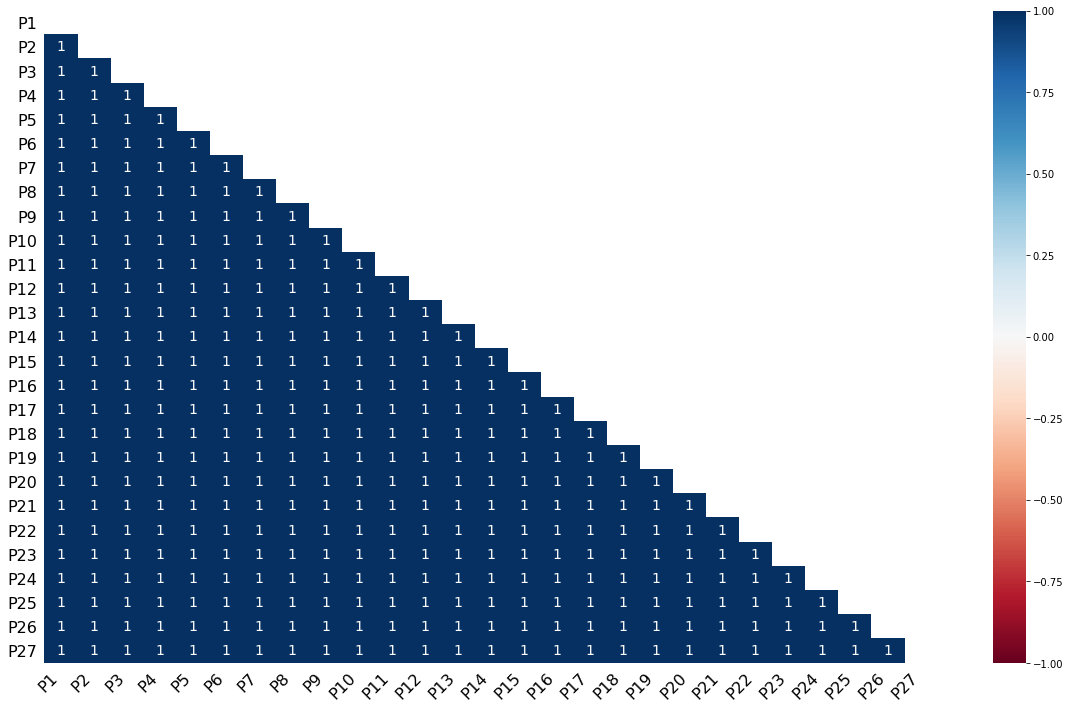

In [72]:
msno.heatmap(df2_tidy)

In [54]:
DOCUMENTACION_PRL = pd.DataFrame(SW[['1. ¿Mente en la tarea?','2. ¿Ojos puestos en la tarea?', '3. ¿Utiliza el equipo correctamente?',
       '4. ¿Realiza la tarea sin apresurarse?', '5. ¿Usa el EPI definido?',
       '6. ¿Sigue procedimientos de trabajo seguros?',
       '7. Se obtiene la autorización ...',
       '8. Verifica el entorno de trabajo, 2 min para mi seguridad',
       '9. El personal actuó con seguridad para la tarea observada.',
       '10.Conoce la Ruta de Evaluación de Emergencias y el Punto de Reunión',
       '11. La persona es consciente de la necesidad de reportar Cuasi Accidentes y Condiciones Inseguras?.']])

ENTORNO_DE_TRABAJO= pd.DataFrame(SW[['12. El personal deja de trabajar si la situación no es segura.',
       '13. El personal esta capacitado y suficientemente formado para la Tarea.','16. Buena limpieza del área de trabajo',
       '17. Área libre de riesgos de resbalones, tropiezos y caídas',
       '18. Pasillos, salidas de emergencia y equipos de emergencia no estan obstruidos.',
       '19. Derrames controlados',
       '20. Todos los contenedores en uso y en el área están etiquetados.',
       '21. Sin ruidos, polvo ni olores',
       '22. Las sustancias peligrosas se almacenan adecuadamente',
       '23. El área de trabajo está protegida contra riesgos',
       '24. Iluminación y ventilación suficientes.']])

EPI_s= pd.DataFrame(SW[['14. Los EPIS definidos son adecuados y se usan correctamente.',
       '15. los EPIS estan en buen estado, bien mantenidos y se almacenan correctamente.']])

EQ_DE_TRABAJO= pd.DataFrame(SW[['25. Uso de equipos intrínsecamente seguro.',
       '26. Protección de la maquina o señal de bloqueo-etiquetado disponible',
       '27. El andamio o la escalera son seguros para su uso.']])


OBSERVACIONES= pd.DataFrame(SW[['Comentarios / Plan de acción']])

INFO_VARIA=pd.DataFrame(SW[['PAIS', 'EMPRESA', 'RAZON SOCIAL', 'CIF', 'CODIGO FLEX EMPRESA',
       'CODIGO GPCN', 'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE',
       'FECHA NACIMIENTO', 'Nº FLEX', 'CODIGO SF', 'MAIL TRABAJADOR',
       'FECHA ANTIGUEDAD', 'NIF', 'SEXO', 'MODALIDAD DEL CONTRATO', 'NIVEL1',
       'NIVEL2', 'NIVEL3', 'PC', 'OFICINA FISICA', 'CODIGO FLEX OFICINA',
       'CATEGORIA / PUESTO', 'CONVENIO', 'NIVEL SALARIAL', 'FTE',
       'GRUPO COSTE', 'MANAGER', 'Nº S.S.', 'GRUPO COTIZACION',
       'CENTRO DE COTIZACION', 'RESPONSABLE PC',
       'APROBADOR PORTAL DEL EMPLEADO', 'MAIL APROBADOR',
       'SEGUNDO APROBADOR COMPRAS',
       'Nombre completo OBSERVADOR','ESTADO DEL EMPLEADO', 'index', 'Número', 'Fecha de creación',
       'Nombre de la persona o personas observadas', 'Grupo Operativo', 'País',
       'Entidad', 'Sitio', 'Nombre del sitio de BV', 'Nombre del cliente',
       'Dirección del sitio']])



In [55]:
df5 = pd.concat([INFO_VARIA,DOCUMENTACION_PRL,ENTORNO_DE_TRABAJO,EPI_s,EQ_DE_TRABAJO,OBSERVACIONES],axis=1,keys=['INFO_VARIA','DOCUMENTACION_PRL','ENTORNO_DE_TRABAJO','EPI_s','EQ_DE_TRABAJO','OBSERVACIONES'])
df.to_excel('table.xlsx', sheet_name='sheet1', index=True, index_label='id')

In [56]:
df5.to_excel('../Data/SW2.xlsx')

In [57]:
df5['DOCUMENTACION_PRL'].describe()


,1. ¿Mente en la tarea?,2. ¿Ojos puestos en la tarea?,3. ¿Utiliza el equipo correctamente?,4. ¿Realiza la tarea sin apresurarse?,5. ¿Usa el EPI definido?,6. ¿Sigue procedimientos de trabajo seguros?,7. Se obtiene la autorización ...,"8. Verifica el entorno de trabajo, 2 min para mi seguridad",9. El personal actuó con seguridad para la tarea observada.,10.Conoce la Ruta de Evaluación de Emergencias y el Punto de Reunión,11. La persona es consciente de la necesidad de reportar Cuasi Accidentes y Condiciones Inseguras?.
count,1019,1019,1019,1019,1019,1019,1019,1019,1019,1019,1019
unique,3,2,3,3,3,3,3,3,3,3,3
top,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
freq,960,975,901,960,904,956,707,899,947,816,950
